# Import df and libraries.

In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import librosa as lr
import librosa.display
from glob import glob

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix,plot_confusion_matrix,cohen_kappa_score,accuracy_score,recall_score,precision_score,f1_score,classification_report

In [3]:
# Import dataframe:
audio_feats_df = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Final-Project-DA\Data\final_df.csv")
audio_feats_df = audio_feats_df.drop(columns=["Unnamed: 0","Unnamed: 0.1", "file name"])
audio_feats_df

,mfcc avg,mfcc mdn,mfcc std,mfcc sum,spc avg,spc mdn,spc std,spc sum,zcr avg,zcr mdn,...,tc mdn,tc std,tc sum,ac avg,ac mdn,ac std,ac sum,filename,category,class
0,-30.621037,0.000000,133.394226,-132282.875000,215.788225,0.000000,717.176604,46610.256598,0.012221,0.000000,...,0.000000,0.057337,10.506051,0.000862,-2.629388e-18,1.980245,95.034199,1-100032-A-0.wav,dog,animals
1,-25.271778,-14.726506,43.930939,-109174.078125,3851.174848,3770.651034,471.515510,831853.767218,0.303727,0.303467,...,-0.005608,0.079221,-3.433233,0.001883,-2.706105e-03,4.992041,207.627041,1-100038-A-14.wav,chirping_birds,natural soundscapes & water
2,6.678396,4.165037,16.359137,28850.671875,3417.287781,3386.712550,319.508973,738134.160685,0.385362,0.399414,...,0.002992,0.041828,5.210136,0.050211,4.283366e-02,165.720405,5535.731441,1-100210-A-36.wav,vacuum_cleaner,interior/domestic
3,6.997509,4.692041,15.818431,30229.240234,3495.792669,3475.238825,183.036219,755091.216591,0.386979,0.398926,...,-0.003369,0.031381,-5.497910,0.047756,-2.901005e-01,713.349622,5265.063297,1-100210-B-36.wav,vacuum_cleaner,interior/domestic
4,-14.365158,-2.496537,98.979042,-62057.484375,1448.737715,1486.180399,390.742728,312927.346421,0.045754,0.043945,...,-0.000574,0.047373,4.549492,0.000060,-3.430340e-05,0.298194,6.667188,1-101296-A-19.wav,thunderstorm,natural soundscapes & water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-6.576713,-0.237287,59.854641,-28411.398438,1747.478407,1671.889413,306.301225,377455.335829,0.103850,0.097412,...,0.004366,0.099978,29.033614,0.007470,5.828310e-05,23.564728,823.530559,5-263831-B-6.wav,hen,animals
1996,-12.022120,-10.838694,15.031034,-51935.558594,4090.176813,4087.804534,86.412482,883478.191684,0.309326,0.314209,...,-0.024682,0.060606,-29.080494,0.006472,1.537501e-02,79.680088,713.503296,5-263902-A-36.wav,vacuum_cleaner,interior/domestic
1997,-6.922936,0.210413,76.220184,-29907.085938,1405.561102,1518.197320,952.325587,303601.198062,0.041597,0.031738,...,-0.001723,0.054725,4.580664,0.008843,-7.706453e-16,57.809372,974.955606,5-51149-A-25.wav,footsteps,human
1998,-2.007078,1.065828,43.239983,-8670.578125,2345.897297,2325.234869,324.291507,506713.816239,0.112822,0.115967,...,0.003629,0.044488,3.431848,0.002788,-1.577616e-02,4.704439,307.363161,5-61635-A-8.wav,sheep,animals


# First attempt

## Data split and model fitting

In [81]:
# All the columns in the dataframe are used of the X set.
X = audio_feats_df.drop(["filename", "class", "category"], axis=1)
y = audio_feats_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)

In [82]:
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [83]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.69

In [84]:
model.score(X_train, y_train)

1.0

In [85]:
len(X_train)

1800

## Confusion Matrix

In [12]:
y_labels = list(y_test.unique())

In [13]:
cnf_mat = confusion_matrix(y_test, y_pred_test, labels=y_labels)

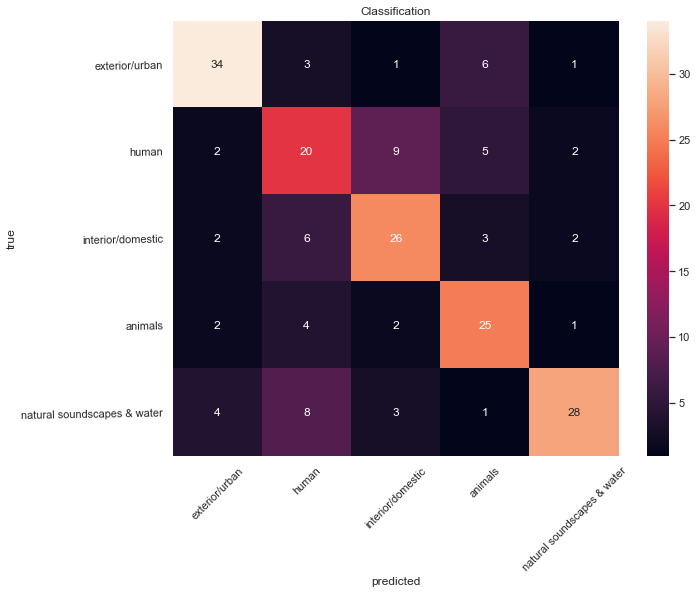

In [73]:
sns.set(rc={'figure.figsize':(10,8)})
g = sns.heatmap(cnf_mat, annot=True, fmt='d',xticklabels=y_labels,yticklabels=y_labels,)
plt.xticks(rotation=45)
plt.yticks(rotation=1)
g.set_title("Classification")
g.set_xlabel("predicted")
g.set_ylabel("true");

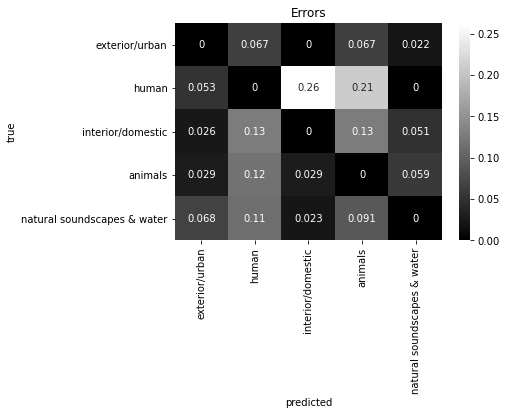

In [14]:
row_sums = cnf_mat.sum(axis=1, keepdims=True)
norm_cnf_mat = cnf_mat / row_sums

np.fill_diagonal(norm_cnf_mat, 0)
g = sns.heatmap(norm_cnf_mat, annot=True, xticklabels=y_labels, yticklabels=y_labels,cmap=plt.cm.gray)
g.set_title("Errors")
g.set_xlabel("predicted")
g.set_ylabel("true");

## Correlation Matrix

<AxesSubplot:>

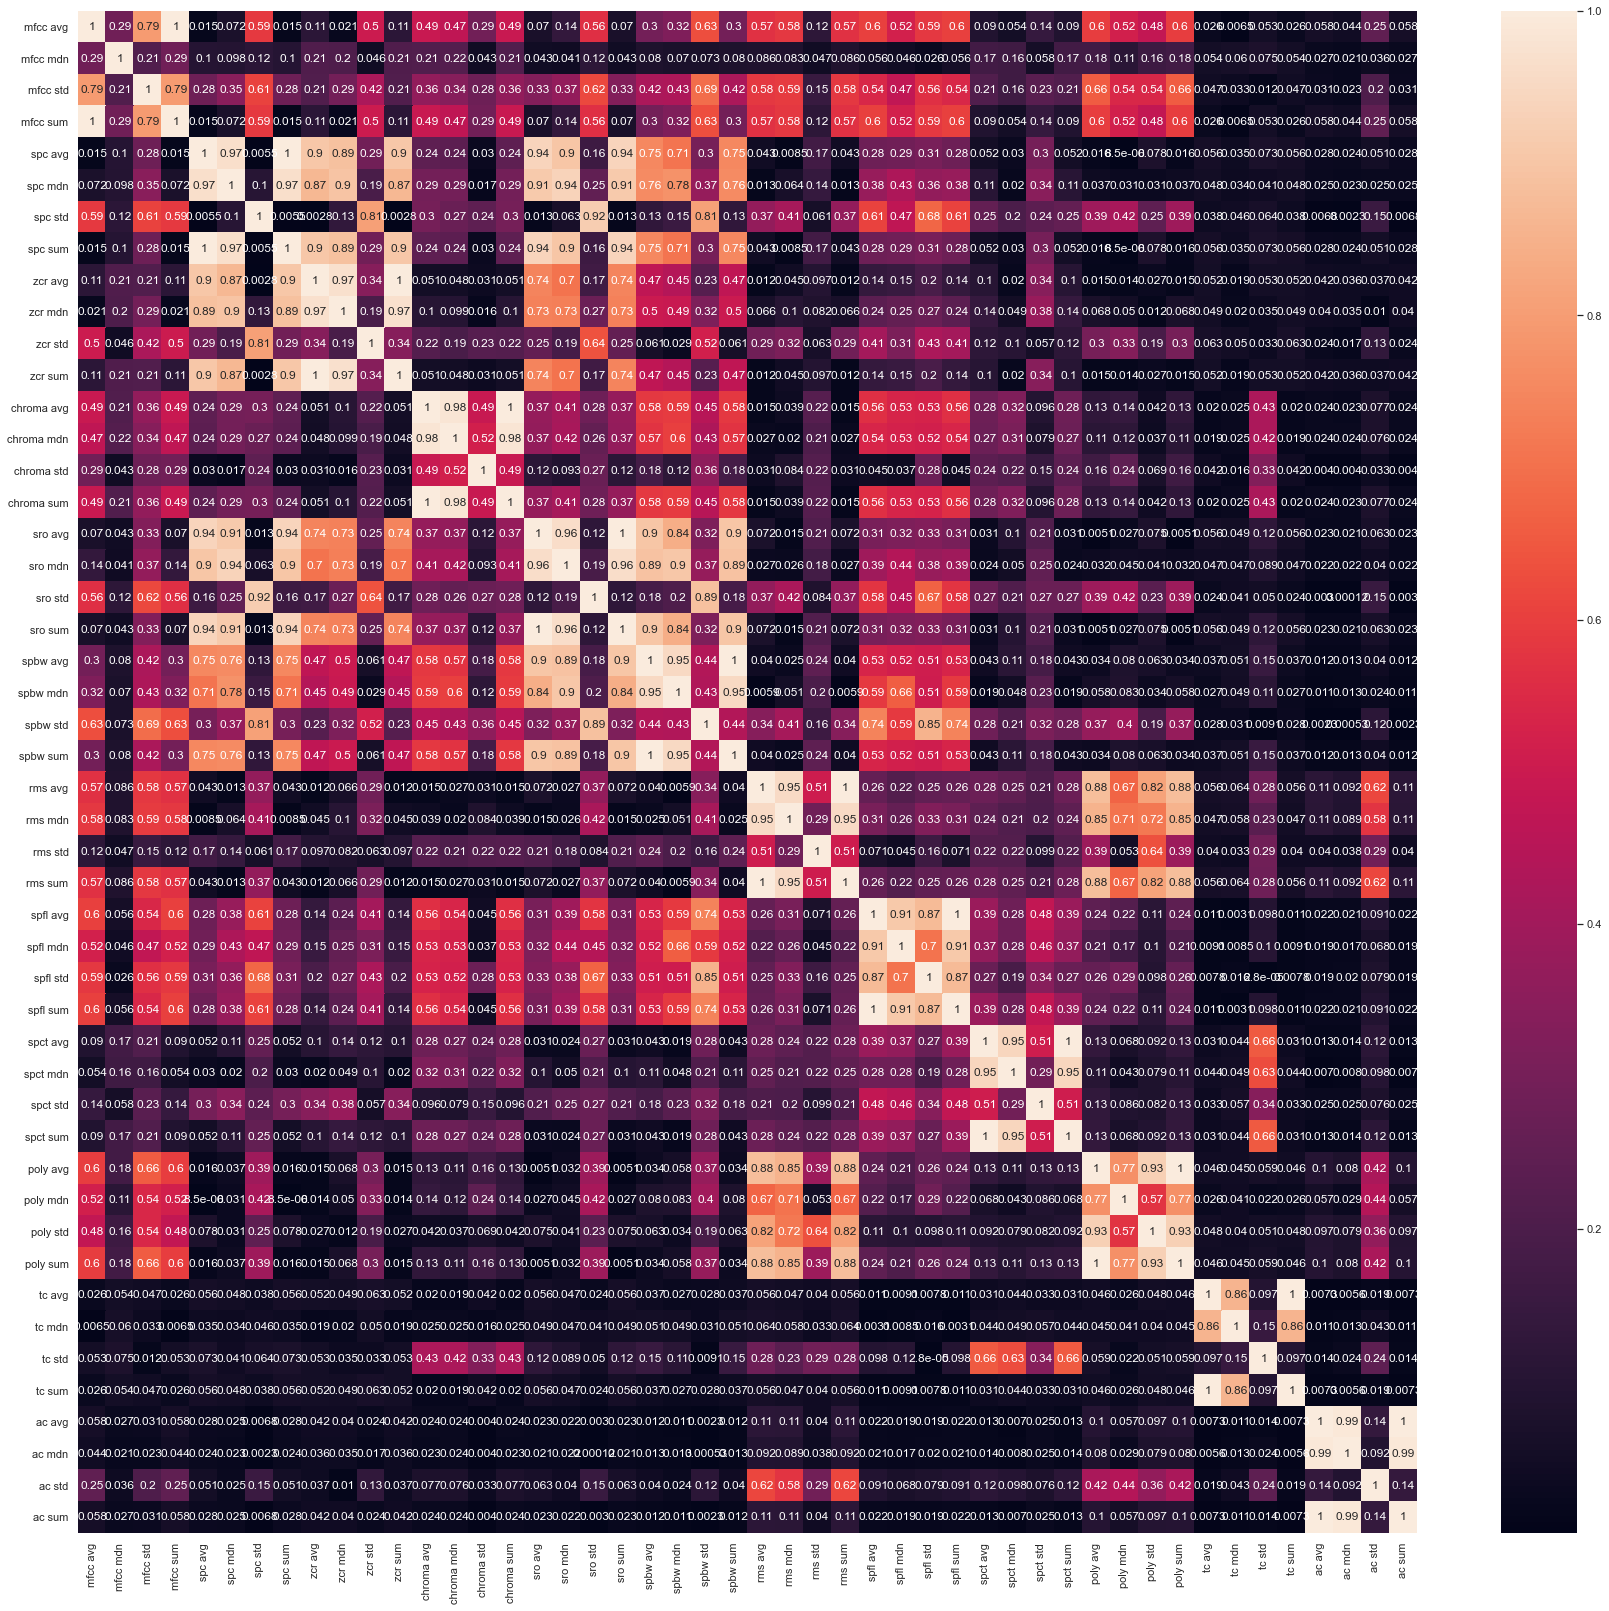

In [19]:
# COrrelation Matrix
sns.set(rc={'figure.figsize':(30,28)})
sns.heatmap(np.abs(audio_feats_df.corr()), annot=True)

# Second attempt

## Dropping the columns with medians and sums, as they usually have big correlation with the average.

In [32]:
# Selecting all 
columns_todrop = []
for i in audio_feats_df.columns:
    if "mdn" in i or "sum" in i:
        columns_todrop.append(i)
columns_todrop

['mfcc mdn',
 'mfcc sum',
 'spc mdn',
 'spc sum',
 'zcr mdn',
 'zcr sum',
 'chroma mdn',
 'chroma sum',
 'sro mdn',
 'sro sum',
 'spbw mdn',
 'spbw sum',
 'rms mdn',
 'rms sum',
 'spfl mdn',
 'spfl sum',
 'spct mdn',
 'spct sum',
 'poly mdn',
 'poly sum',
 'tc mdn',
 'tc sum',
 'ac mdn',
 'ac sum']

## Splitting and model fitting

In [49]:
# Columns with medians and sums are dropped:
X = audio_feats_df.drop(columns_todrop+["filename", "class", "category"], axis=1)
y = audio_feats_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=10)

In [50]:
model = RandomForestClassifier(random_state=10)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=10)

In [51]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_score(y_test, y_pred_test)

0.67

In [52]:
model.score(X_train, y_train)

1.0

## Confusion and Corr Matrix

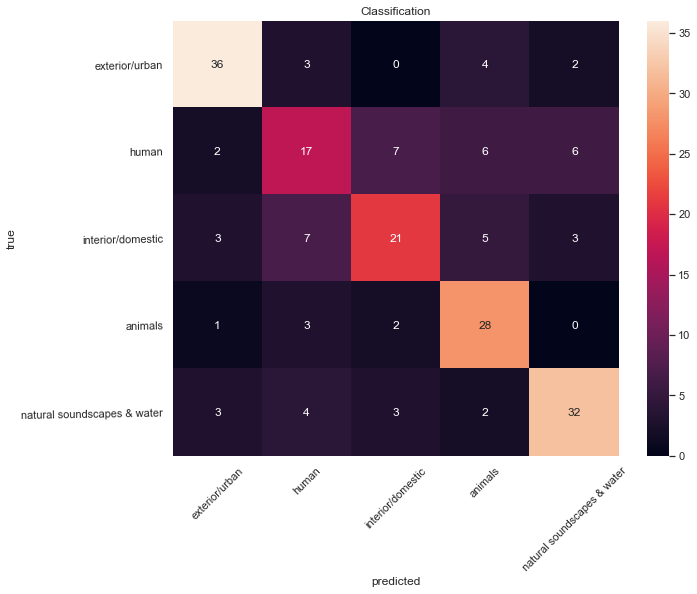

In [53]:
y_labels = list(y_test.unique())

cnf_mat = confusion_matrix(y_test, y_pred_test, labels=y_labels)

sns.set(rc={'figure.figsize':(10,8)})
g = sns.heatmap(cnf_mat, annot=True, fmt='d',xticklabels=y_labels,yticklabels=y_labels,)
plt.xticks(rotation=45)
plt.yticks(rotation=1)
g.set_title("Classification")
g.set_xlabel("predicted")
g.set_ylabel("true");

<AxesSubplot:>

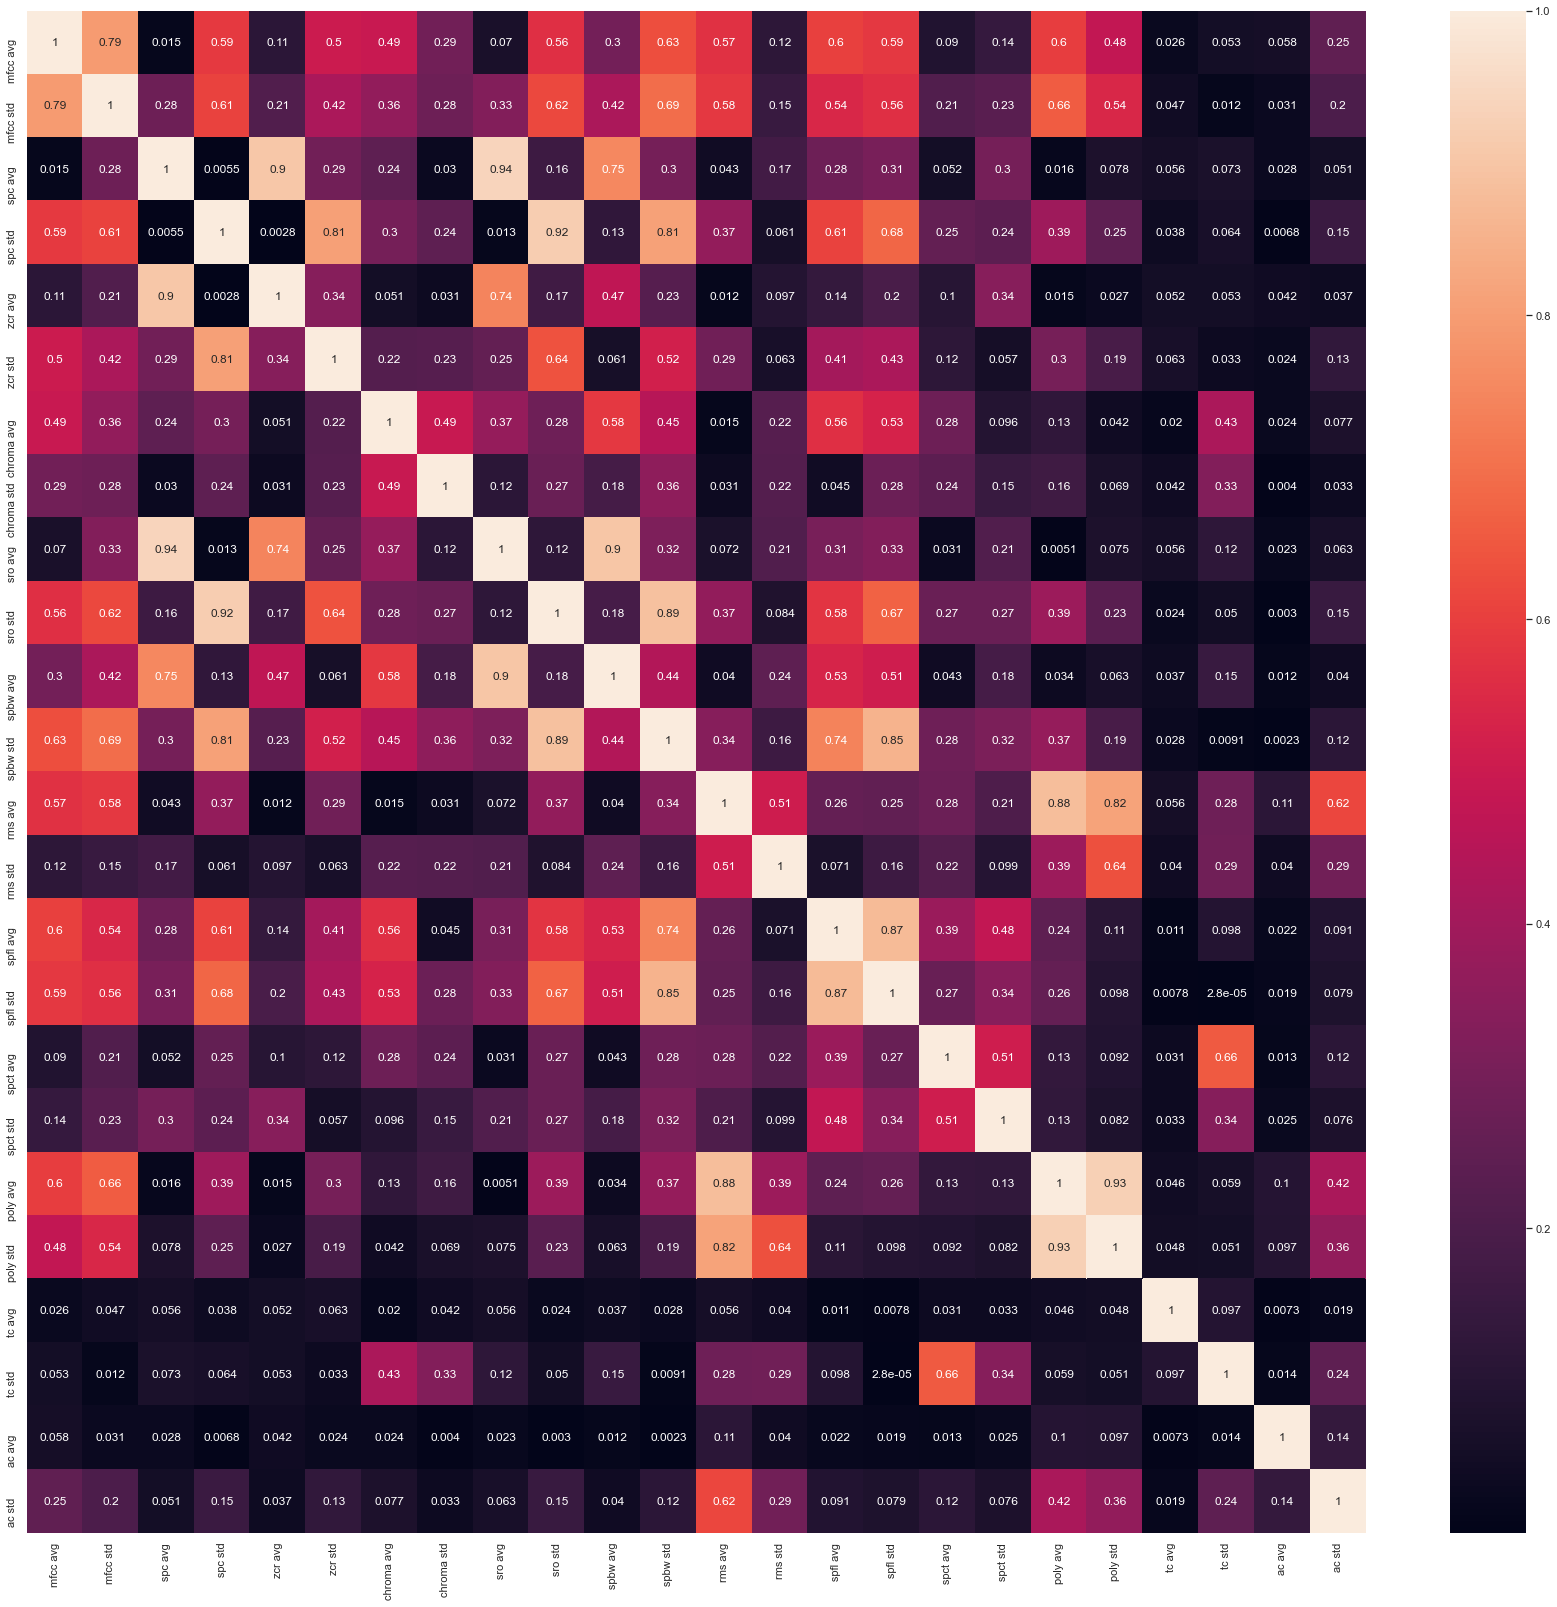

In [54]:
# COrrelation Matrix
audio_feats_df2 = audio_feats_df.drop(columns_todrop+["filename", "class", "category"], axis=1)
sns.set(rc={'figure.figsize':(30,28)})
sns.heatmap(np.abs(audio_feats_df2.corr()), annot=True)

## GridSearch

In [55]:
from sklearn.model_selection import GridSearchCV

In [58]:
grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid= {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
                                                                       'max_features': ['auto', 'sqrt'],
                                                                       'n_estimators': [1000, 2000]}, cv = 10)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [1000, 2000]})

In [59]:
grid.best_params_

{'max_depth': 30, 'max_features': 'sqrt', 'n_estimators': 2000}

In [62]:
y_pred_test = grid.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.695

# Prediction on val df

In [75]:
# Import validation dataframe.
val_df = pd.read_csv(r"C:\Users\trito.DESKTOP-V9IEUOR\Desktop\IronHack Data Analyst\Projects\Final-Project-DA\Data\val_df.csv")
val_df = val_df.drop(columns_todrop+["Unnamed: 0"], axis=1)
val_df

,mfcc avg,mfcc std,spc avg,spc std,zcr avg,zcr std,chroma avg,chroma std,sro avg,sro std,...,spfl avg,spfl std,spct avg,spct std,poly avg,poly std,tc avg,tc std,ac avg,ac std
0,-20.328279,80.626434,2857.687784,550.125634,0.191008,0.044493,0.498809,0.274704,5221.901449,1300.675560,...,0.069731,0.060233,17.267107,7.087584,1.067919,3.760721,-0.001616,0.042859,0.286132,29.727285
1,-20.742882,110.966766,710.331491,1029.717598,0.033960,0.053820,0.158897,0.284617,1422.238159,2153.892332,...,0.608467,0.484333,20.005697,5.501807,0.315732,1.258197,0.011194,0.117367,0.005372,49.305734
2,-23.803082,106.855492,1461.116387,1618.969948,0.063049,0.072576,0.318456,0.354198,2768.561808,2970.374711,...,0.497934,0.486714,16.700859,6.128300,0.368178,1.521145,0.006290,0.051860,0.002437,5.415907
3,-24.871214,96.986153,3137.045923,1229.686895,0.215927,0.087633,0.665199,0.213306,6180.428060,2601.019548,...,0.146842,0.110605,16.038576,6.944653,0.164121,0.540952,0.001689,0.027174,0.000535,1.068635
4,-1.244991,37.328632,2691.376402,497.150014,0.143749,0.043875,0.628835,0.218612,5845.516968,1000.553483,...,0.077682,0.042014,16.558375,6.950861,1.213023,1.613889,0.046963,0.060753,0.006392,6.098039


In [87]:
predict = grid.predict(val_df)
predict
# array(['human', 'exterior/urban', 'human', 'human', 'exterior/urban'], dtype=object)
# THis result is bad. It has only two correct predictions.

array(['human', 'exterior/urban', 'human', 'human', 'exterior/urban'],
      dtype=object)